In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import seaborn as sb

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
totalData = pd.read_csv('https://raw.githubusercontent.com/indicium15/sc1015-project/main/totalData.csv')
totalData.drop(['Unnamed: 0'], inplace=True, axis=1)
totalData.head()

,title,class
0,donald trump sends out embarrassing new years ...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes an internet joke ...,0
3,trump is so obsessed he even has obamas name c...,0
4,pope francis just called out donald trump duri...,0


In [8]:
# import preprocess_kgptalkie as ps
# totalData['title'] = totalData['title'].apply(lambda x: ps.remove_special_chars(x))
totalData = totalData[totalData['title'].notnull()]
# totalData.head()
y = totalData['class'].values
x = [d.split() for d in totalData['title'].tolist()]

# print(x.)
# print(y)

In [9]:
## converting the words to vectors
wordToVec = gensim.models.Word2Vec(sentences=x, size=100, window=10, min_count=1)
len(wordToVec.wv.vocab)

26133

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

(array([1.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.600e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.400e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.810e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

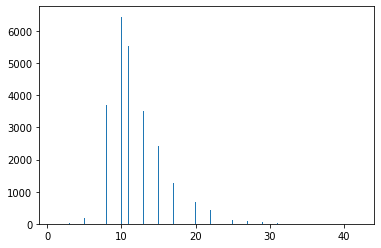

In [11]:
plt.hist([len(y) for y in x], bins=700)

In [12]:
array = np.array([len(y) for y in x])
maximumLength = 1000
x = pad_sequences(x, maxlen=maximumLength)

In [13]:
sizeOfVocab = len(tokenizer.word_index) + 1
totalVocab = tokenizer.word_index


In [14]:
def calculateMatrixWeight(model):
    matrixWeight = np.zeros((sizeOfVocab, 100))
    for word, index in totalVocab.items():
        matrixWeight[index]=model.wv[word]
    return matrixWeight

In [15]:
vectorsToEmbed = calculateMatrixWeight(wordToVec)
vectorsToEmbed.shape

(26134, 100)

In [16]:
totalModel = Sequential()
totalModel.add(Embedding(sizeOfVocab, output_dim=100, weights=[vectorsToEmbed], input_length=maximumLength, trainable=False))
totalModel.add(LSTM(units=128))
totalModel.add(Dense(1, activation='sigmoid'))
totalModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
%pip install keras


In [18]:
totalModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         2613400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,730,777
Trainable params: 117,377
Non-trainable params: 2,613,400
_________________________________________________________________


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
totalModel.fit(x_train,y_train, validation_split=0.3, epochs=6)
# print(y.shape)
# print(x.shape)

Epoch 1/6
737/737 [==============================] - 133s 170ms/step - loss: 0.2679 - acc: 0.8873 - val_loss: 0.2542 - val_acc: 0.8968
Epoch 2/6
737/737 [==============================] - 123s 166ms/step - loss: 0.2272 - acc: 0.9062 - val_loss: 0.2129 - val_acc: 0.9140
Epoch 3/6
737/737 [==============================] - 123s 167ms/step - loss: 0.2098 - acc: 0.9140 - val_loss: 0.2015 - val_acc: 0.9204
Epoch 4/6
737/737 [==============================] - 123s 166ms/step - loss: 0.2026 - acc: 0.9165 - val_loss: 0.1955 - val_acc: 0.9193
Epoch 5/6
737/737 [==============================] - 123s 167ms/step - loss: 0.1901 - acc: 0.9224 - val_loss: 0.1894 - val_acc: 0.9252
Epoch 6/6
737/737 [==============================] - 122s 166ms/step - loss: 0.1820 - acc: 0.9271 - val_loss: 0.2031 - val_acc: 0.9213


In [20]:
y_pred_train = (totalModel.predict(x_train) >= 0.5).astype(int)
y_pred_test = (totalModel.predict(x_test) >= 0.5).astype(int)
print('The accuracy for test: {}'.format(accuracy_score(y_test, y_pred_test)))

The accuracy for test: 0.9249754967477501


The first evaluation we can do is seeing the confusion matrix from our train and test data, and looking at the preciseness of the model through metrics like accuracy, precision, recall, specificity, and F-Score.

Test Data
Accuracy: 92.50%
Precision: 91.50%
Recall: 94.48%
Specificity: 90.30%
F-Score:  0.9296809754468013


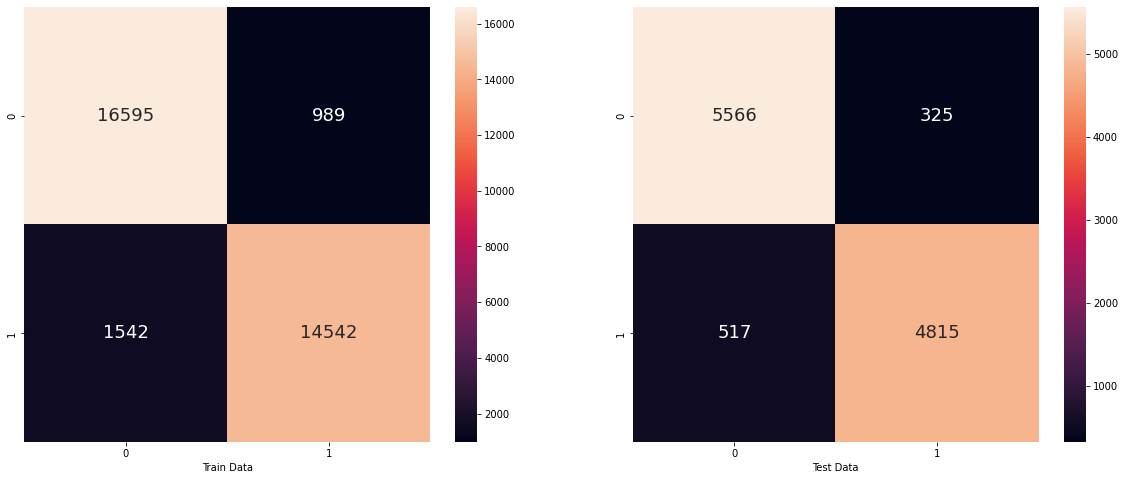

In [21]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))

from sklearn.metrics import confusion_matrix
train = sb.heatmap(confusion_matrix(y_train, y_pred_train), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
train.set( xlabel = "Train Data")


test = sb.heatmap(confusion_matrix(y_test, y_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
test.set(xlabel="Test Data")

test_confusion_matrix = confusion_matrix(y_test, y_pred_test)
test_accuracy = (test_confusion_matrix[0][0] + test_confusion_matrix[1][1])/(test_confusion_matrix[0][0]+test_confusion_matrix[0][1]+test_confusion_matrix[1][0]+test_confusion_matrix[1][1])
test_precision = (test_confusion_matrix[0][0])/(test_confusion_matrix[0][0]+test_confusion_matrix[1][0])
test_recall = (test_confusion_matrix[0][0])/(test_confusion_matrix[0][0]+test_confusion_matrix[0][1])
test_specificity = (test_confusion_matrix[1][1])/(test_confusion_matrix[1][1]+test_confusion_matrix[1][0])
test_f_score = (2*test_precision*test_recall)/(test_precision+test_recall)
print("Test Data")
print("Accuracy: {:.2%}".format(test_accuracy))
#Precision - how much the model is right when it says that it is right
print("Precision: {:.2%}".format(test_precision))
#Recall - how many extra right ones did the model miss when we said it was right?
print("Recall: {:.2%}".format(test_recall))
#Specificity - negative instances out of the total negative instances
print("Specificity: {:.2%}".format(test_specificity))
#F-Score - higher the better. Means that model positive predictions are actually positive and negative predictions are actually negative
print("F-Score: ",test_f_score)



We can also use our model to plot a ROC Curve, which shows us the true positive rate of our model with respect to the false positive rate. As you can see, our model is in the top left region of the curve, meaning that we are achieving a good true positive rate with a low false positive rate.

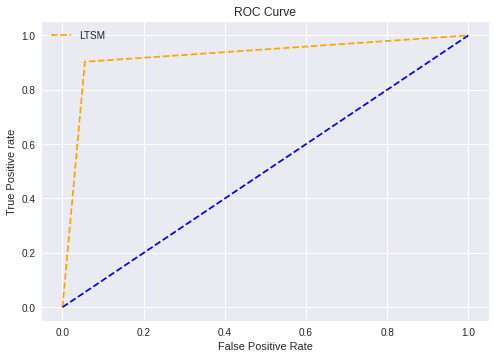

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_test, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, y_pred_test)

#print("False Positive Rate: ",fpr1)
#print("True Positive Rate: ",tpr1)
#print("Threshold Values: ",thresh1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LTSM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



Here we are saving the model for future use so that we do not need to compile the model every time we wish to run evaluation calculations. The resuling file is model.h5 stored in the repository.

In [24]:
from keras.models import load_model
totalModel.save('model.h5')
print("saved model to disk")

saved model to disk


In [25]:
totalModel2 = load_model('model.h5')
totalModel2.summary() #Test to see if the model values are the same

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         2613400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,730,777
Trainable params: 117,377
Non-trainable params: 2,613,400
_________________________________________________________________


Now we will run the model through blind data from the Onion Dataset. In this instance, we are isolating the headlines of articles from the Onion and running it through the model.

We know that all the headlines are fake news, so we can claculate the total accuracy of the model based on the number of false predictions it makes over the number of total predictions.

Finally, we also save the wrongly classified headlines in a txt file so we can carry out further analysis on them.

In [26]:
blinddata = pd.read_csv('https://raw.githubusercontent.com/indicium15/sc1015-project/main/OnionOrNot.csv')
blinddata.head()
onion_articles = pd.DataFrame(blinddata[blinddata.label.eq(1)])
del onion_articles['label']
onion_articles.head()
true = 0
false_positives = []
false = 0
for index, row in onion_articles.iterrows():
  x = row['text']
  #print(x)
  x = tokenizer.texts_to_sequences(x)
  x = pad_sequences(x, maxlen=maximumLength)
  comp = (totalModel2.predict(x)>=0.5).astype(int)[0][0]
  if(comp==0):
    #print("Fake")
    false+=1
  else:
    #print("True")
    true+=1
    false_positives.append(row['text'])


print("Predicted Fake: ", false)
print("Predicted True: ", true)
print("Percentage Accuracy: {:.2%}".format(false/(false+true)))

Predicted Fake:  8075
Predicted True:  925
Percentage Accuracy: 89.72%


In [27]:
#Save to a txt for easier reference in the future!
with open('falsepositives.txt', 'w') as f:
    for item in false_positives:
        f.write("%s\n" % item)

We can see that those articles which have a factual tone and do not use overly negative language tend to be classified as true news.

We can run our model through the other set of data in the Onion Dataset, which consists of news headlines which sound like fake news / satire but are not.

In [28]:
blinddata = pd.read_csv('https://raw.githubusercontent.com/indicium15/sc1015-project/main/OnionOrNot.csv')
blinddata.head()
normal_articles = pd.DataFrame(blinddata[blinddata.label.eq(0)])
del normal_articles['label']
normal_articles.head()
true2 = 0
false_negatives = []
false2 = 0
count = 0
for index, row in normal_articles.iterrows():
    x = row['text']
    #print(x)
    x = tokenizer.texts_to_sequences(x)
    x = pad_sequences(x, maxlen=maximumLength)
    comp = (totalModel2.predict(x)>=0.5).astype(int)[0][0]
    if(comp==0):
      #print("Fake")
      false2+=1
      false_negatives.append(row['text'])
    else:
      #print("True")
      true2+=1

Similar to the previous line of code, we can calculate the percentage accuracy of the model and output the wrongly classified headlines into a .txt file to further analyse.

In [29]:
print("Predicted Fake: ",false2)
print("Predicted True: ",true2)
print("Percentage Accuracy: {:.2%}\n".format(true2/(true2+false2)))
print("Examples of False Negatives: ")
for i in range(0,15):
  print(false_negatives[i])
  with open('falsenegatives.txt', 'w') as f:
    for item in false_negatives:
        f.write("%s\n" % item)


Predicted Fake:  14251
Predicted True:  749
Percentage Accuracy: 4.99%

Examples of False Negatives: 
Muslim Woman Denied Soda Can for Fear She Could Use It as a Weapon
Omaha dad finds pot brownies, eats 4 of them, says mean things to cat
Pokémon Go player stabbed, keeps playing
Woman's rejected "8theist" license plate violates First Amendment
Man Tries to Rob a Bank After Paying $500 to a Wizard to Make Him Invisible
Ohio parents sue their olympic gold medalist daughter for telling stories that cast them in a bad light... so everyone knows that they are not selfish, don't bully her and haven't cheated her financially.  
Match-predicting koala sacked for poor results
Court: 93-Year-Old Kills Wife Of 70 Years Because ‘He Couldn’t Take It Anymore’
Deputies ask man to quit calling about his stolen marijuana
Lyrics to Carly Rae Jepsen's next single to be crowdsourced via online poll
Meat company bans animal testing, confuses everybody
PTSD veterans 'cured' with ecstasy treatment in weeks, 

Some interesting findings - our model seems to be better at classifying fake news headlines compared to real news headlines. In order to solidify this hypothesis, we can run this model through another similar set of true and fake news data and see if the outcomes are the same.

In [31]:
buzzfeed_real = open('buzzfeed_merged_real.txt','r')
lines = buzzfeed_real.readlines()
buzz_false = 0
buzz_true = 0
buzz_false_negatives = []

for line in lines:
  #print(line)
  x = line
  x = tokenizer.texts_to_sequences(x)
  x = pad_sequences(x, maxlen=maximumLength)
  comp = (totalModel2.predict(x)>=0.5).astype(int)[0][0]
  if(comp==0):
    #print("Fake")
    buzz_false +=1
    buzz_false_negatives.append(line)
    #print(buzz_false_negatives)
  else:
    #print("True")
    buzz_true +=1


print("Predicted False: ",buzz_false)
print("Predicted True: ",buzz_true)
print("Accuracy: {:.2%}\n".format(buzz_true/(buzz_false + buzz_true)))

with open('buzzfeed_false_negatives.txt', 'w') as f:
    for item in buzz_false_negatives:
        f.write("%s\n" % item)

Predicted False:  52
Predicted True:  1
Accuracy: 1.89%



In [33]:
buzzfeed_fake = open('buzzfeed_merged_fake.txt','r',encoding='cp1252')
lines = buzzfeed_fake.readlines()
buzz2_false = 0
buzz2_true = 0
buzz2_false_positives = []

for line in lines:
  #print(line)
  x = line
  x = tokenizer.texts_to_sequences(x)
  x = pad_sequences(x, maxlen=maximumLength)
  comp = (totalModel2.predict(x)>=0.5).astype(int)[0][0]
  if(comp==0):
    #print("Fake")
    buzz2_false +=1
  else:
    #print("True")
    buzz2_true +=1
    buzz2_false_positives.append(line)

print("Predicted False: ",buzz2_false)
print("Predicted True: ",buzz2_true)
print("Percentage Accuracy: {:.2%}\n".format(buzz2_false/(buzz2_false + buzz2_true)))

with open('buzzfeed_false_positives.txt', 'w') as f:
    for item in buzz2_false_positives:
        f.write("%s\n" % item)

Predicted False:  48
Predicted True:  0
Percentage Accuracy: 100.00%



In [36]:
abcdata = pd.read_csv('https://raw.githubusercontent.com/indicium15/sc1015-project/main/abcnews-date-text.csv')
abcdata.head()
del abcdata['publish_date']
abcdata.head()
count = 0
abctrue = 0
abc_false_negatives = []
abcfalse = 0
for index, row in abcdata.iterrows():
  if(index < 1000):
    x = row['headline_text']
    #print(x)
    x = tokenizer.texts_to_sequences(x)
    x = pad_sequences(x, maxlen=maximumLength)
    comp = (totalModel2.predict(x)>=0.5).astype(int)[0][0]
    if(comp==0):
      #print("Fake")
      abcfalse+=1
      abc_false_negatives.append(row['headline_text'])
    else:
      #print("True")
      abctrue+=1 
  else:
    break

print("Predicted Fake: ", abcfalse)
print("Predicted True: ", abctrue)
print("Percentage Accuracy: {:.2%}\n".format(abctrue/(abcfalse+abctrue)))

with open('abc_false_negatives.txt', 'w') as f:
    for item in abc_false_negatives:
        f.write("%s\n" % item)



Predicted Fake:  953
Predicted True:  47
Percentage Accuracy: 4.70%

